 Federico Peña  Tarea 1  ANEDP
 

# Problema 1.1
Resolver el P.V.C $-u''+u = f$   en (a,b), con u(a) = u(b)  = 0

### a) Implementar un codigo genérico

In [78]:
import numpy as np 
from sympy import *
import scipy.integrate as integrate
import scipy.special as special
from scipy import linalg
from math import pi
import matplotlib.pyplot as plt
import time
from scipy import optimize

In [79]:
#definición de las funciones básicas que se van a utilizar para la discretización


def phi(x,i):
    if mesh[i-1] <= x <= mesh[i]:
        return (x-mesh[i-1])/(mesh[i]-mesh[i-1])
    elif mesh[i] < x <= mesh[i+1]:
        return (mesh[i+1]-x)/(mesh[i+1]-mesh[i])
    else:
        return 0
    
    

def D_phi(x,i):
    if mesh[i-1] <= x <= mesh[i]:
        return 1/(mesh[i]-mesh[i-1])
    elif mesh[i] <= x <= mesh[i+1]:
        return -1/(mesh[i+1]-mesh[i])
    else:
        return 0
    return aux;

In [80]:
#u_h es la funcion solución  discretizada obtenida a partir de los puntos dados por u_d, 
#los valores discretos de u_d se obtienen mas adelante 


def u_h(x,mesh):
    s1=0
    for i in range(len(mesh))[1:]:
        if mesh[i-1] <= x and x <= mesh[i]:
            s1 = s1 +u_d[i]*phi(x,i)
        elif mesh[i] <= x <= mesh[i+1]:
            s1= s1 + u_d[i]*phi(x,i)
        else:
            s1=s1
    return s1;

#du_h es la derivada de la función solución discretizada.
def du_h(x,mesh):
    s1=0
    for i in range(len(mesh))[1:]:
        if mesh[i-1] <= x and x <= mesh[i]:
            s1 = s1 +u_d[i]/(mesh[i]-mesh[i-1])
        elif mesh[i] <= x <= mesh[i+1]:
            s1= s1 - u_d[i]/(mesh[i]-mesh[i-1])
        else:
            s1=s1
    return s1;



In [81]:
#definimos las funciones de los coeficientes que van a formar el sistema de ecuaciones lineales Mx=F

In [82]:
def a1(i):
    #se corre el i en uno para el phi, ya que en general se itera desde el 0, 
    #pero la identificación de phi parte en 1.
    
    s1 = integrate.quad(lambda x: phi(x,i+1)**2, a, b, limit=80)[0]
    s2 = integrate.quad(lambda x: D_phi(x,i+1)**2, a, b, limit=80)[0]
    return s1+s2;


In [83]:
def b1(i):
    s1 = integrate.quad(lambda x: D_phi(x,i)*D_phi(x,i+1), a, b, limit=80)[0]
    s2 = integrate.quad(lambda x: phi(x,i)*phi(x,i+1), a, b, limit=80)[0]
    return s1+s2;



In [84]:
#los coeficientes de F, ojo que f(x) se definirá despues
def F(n):
    aux=np.ones(n-1)
    for i in range(n-1):
        aux[i]= integrate.quad(lambda x: f(x)*phi(x,i+1),a,b, limit=80)[0]
    return aux;


In [85]:
def M(n):
    M = np.zeros((n-1, n-1))
    for i in range(len(M)):
        M[i,i] = a1(i)
        if i != 0:
            M[i-1,i] = b1(i)
            M[i,i-1] = b1(i)
    return M;

In [86]:
#definimos los últimos parámetros del problema, 
# la partición mesh, que pueden ser idénticas, o definidas,
# y los extremos a,b del problema
# en este caso 0,1
a=0
b=1


n = 15  
mesh = np.linspace(a,b,n+1)
h=(a-b)/n

In [87]:
#usando la libreria linalg de scipy, resolvemos el sistema de ecuación, 
#esto nos va a entregar los valores de u en los nodos
u_d = linalg.solve(M(n), F(n))

Con esto hemos implementado un codigo que nos permite obtener la solución del problema para cualquier f, partición "mesh" del intervalo (a,b)

Cualquier modificación se puede realizar de manera acorde, ahora continuando al item b)

1.b) Demonós una función u que cumpla las condiciones de borde y encontresmos f acordemente. 
$u(x) = ln(x+1)*sin(x*pi)$
$=> f(x)= -[-sin(π x)/(x + 1)^2 + (2 π cos(π x))/(x + 1) - π^2 log(x + 1) sin(π x)] +  ln(x+1)*sin(x*pi)$

$d^2u/dx^2[log(x + 1) sin(x π)] = -sin(π x)/(x + 1)^2 + (2 π cos(π x))/(x + 1) - π^2 log(x + 1) sin(π x)$

In [115]:
#definimos el f acorde al problema de EDP
def f(x):
    ddu = np.sin(pi*x)/((x + 1)**2) - (2*pi*np.cos(pi*x))/(x + 1) + pi**2*np.log(x + 1)*sin(pi*x)
    u = ln(x+1)*sin(pi*x)
    return ddu+u;

#el menos ya esta incorporado en ddu

In [116]:
#aqui dejaremos las funciones exactas
u_e= lambda x: np.log(x+1)*np.sin(x*pi)
du_e=lambda x: np.sin(x*pi)/(x+1) +pi*np.cos(x*pi)*np.log(x+1)

## 1.1.b) Implementación
#### Ahora vamos a realizar la implementación de este codigo para nuestro caso particular.

In [128]:
#particiónes del intervalo se pueden definir o utilizar una partición equidistante, lo importante es n
tic = time.time()
n = 15   #inteevalos
mesh = np.linspace(0,1,n+1)#n+1 nodos
h=1/15
a=0
b=1

In [129]:
len(mesh)

16

In [130]:
print('nuestra malla tiene los siguientes nodos:',mesh)



nuestra malla tiene los siguientes nodos: [0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ]


In [131]:
aux= F(n)


array([-0.36004842, -0.27801193, -0.17650269, -0.0627166 ,  0.05566614,
        0.17088895,  0.27552721,  0.36287584,  0.4272967 ,  0.46450829,
        0.47180386,  0.448187  ,  0.39441883,  0.31297444])

In [132]:
aux1=M(n)


array([[ 30.04444444, -14.98888889,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-14.98888889,  30.04444444, -14.98888889,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        , -14.98888889,  30.04444444, -14.98888889,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , -14.98888889,  30.04444444,
        -14.98888889,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , -14.98888889,
         30.04444444

In [133]:
len(aux)

14

In [134]:
u_d = linalg.solve(M(n), F(n))

In [135]:
u_d

array([0.01342095, 0.05092262, 0.10719864, 0.17572703, 0.2492212 ,
       0.32011003, 0.38102157, 0.42524571, 0.44715157, 0.44253868,
       0.40890391, 0.34561093, 0.25395386, 0.13711222])

In [136]:
#agreguemos los valores en los extremos que nos estan faltando
u_d=np.concatenate(([0],u_d,[0]))

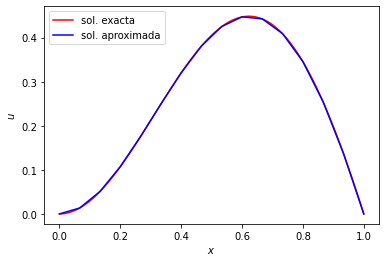

In [137]:

N=1000
z=np.linspace(0,1,N)
y=np.ones(N)
for i in range(N):
    y[i]=u_e(z[i])   
y2 = u_d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(z,y, 'r', label='sol. exacta')
plt.plot(mesh,u_d, 'b', label='sol. aproximada')
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend()

plt.show()

In [138]:
toc = time.time()
print(toc-tic)

85.825266122818


### 1.1.c) cotas del error
implementamos una norma en L2 para ladiferencia de las dos funciones que ya estamos usando,u_h, u_e
y la de la diferencia de sus derivadas.

In [149]:
def L2(tipo):
    if tipo ==0:
        aux= integrate.quad(lambda x: (u_h(x,mesh)-u_e(x))**2,0,1, limit=80)[0]
        aux=sqrt(aux)
        return aux;
    else:
        aux= integrate.quad(lambda x: (du_h(x,mesh)-du_e(x))**2,0,1, limit=80)[0]
        aux=sqrt(aux)
        return aux;

In [150]:
h=1/n

In [151]:
#buscamos el valor magimo de u'' en el intervalo, así que lo encontramos usando la librería optimize
#así obtenemos el argumento que mínimiza el negativo de u''
ddu = lambda x: np.sin(x*pi) - (2*pi*np.cos(pi*x))/(x + 1) + pi**2*np.log(x + 1)*np.sin(pi*x) +np.log(x+1)*np.sin(x*pi)
max_ddu = optimize.fminbound(lambda x: -abs(ddu(x)), 0,1 ) 
max_ddu

0.7070762331222478

In [152]:
ddu(max_ddu)

7.6504508721324544

con esto nuestras estimaciones del  error dan:

In [157]:
print('|u_e-u_h|=', L2(0), '<C*',h**2*ddu(max_ddu))
print('|u_e´-u_h´|=', L2(1), '<C*',h*ddu(max_ddu))

|u_e-u_h|= 0.00187513666459426 <C* 0.03400200387614424
|u_e´-u_h´|= 0.0922419847584084 <C* 0.5100300581421636


<ipython-input-149-e3d8a6263932>:7: IntegrationWarning: The maximum number of subdivisions (80) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  aux= integrate.quad(lambda x: (du_h(x,mesh)-du_e(x))**2,0,1, limit=80)[0]


bastaría tomar C=0.2, 
en este caso con n =15, esta no es la cota menor pero funciona suficientemente bien para varios n.

## 1.2) Problema de valores propios

Se quiere resolver el problema $-u'' = \lambda u$,
con condición 0 en la frontera (0,1)

f=0 en este caso

Una vez que se plantea una formulación débil discreta , se puede resolver como un problema de valores propios generalizados $KU=\lambda_h B U$

Ahora, utilizando las herramientas ya definidas con algunos cambios, procedamos.


In [162]:
def a2(i):
    s2 =  integrate.quad(lambda x: D_phi(x,i+1)**2, 0, 1, limit=80)[0]
    return s2;

def a3(i):
    s1 = integrate.quad(lambda x: phi(x,i+1)**2, 0, 1, limit=80)[0]
    return s1;

In [163]:
def b2(i):
    s1 = integrate.quad(lambda x: D_phi(x,i)*D_phi(x,i+1), 0, 1, limit=80)[0]
    return s1;
def b3(i):
    s2 = integrate.quad(lambda x: phi(x,i)*phi(x,i+1), 0, 1, limit=80)[0]
    return s2;

In [164]:
def K(n):
    K = np.zeros((n-1, n-1))
    for i in range(len(K)):
        K[i,i] = a2(i)
        if i != 0:
            K[i-1,i] = b2(i)
            K[i,i-1] = b2(i)
    return K;

In [165]:
def B(n):
    B = np.zeros((n-1, n-1))
    for i in range(len(B)):
        B[i,i] = a3(i)
        if i != 0:
            B[i-1,i] = b3(i)
            B[i,i-1] = b3(i)
    return B;

In [167]:
u_d2


array([150.00000005, 232.23479898, 337.29684281, 455.67828918,
       558.00618824])

In [206]:
#u_h2 es la funcion  discretizada obtenida a partir de los puntos dados por u_d2 para este caso

def u_h2(x,mesh,L):
    s1=0
    for i in range(len(mesh2))[1:n2-1]:
        if mesh2[i-1] <= x and x <= mesh2[i]:
            s1 = s1 +u_d2[L][i]*phi(x,i)
        elif mesh2[i] <= x <= mesh2[i+1]:
            s1= s1 + u_d2[L][i]*phi(x,i)
        else:
            s1=s1
    return s1;

#la solución exacta la obtuvimos de forma analítica considerando las condiciones de borde
def u_e2(x,L):
    return np.sin(L**2*np.pi**2*x);

In [220]:

n2= 16
mesh2 = np.linspace(0,1,n2+1) 
h2=1/n2
ld,u_d2 = linalg.eigh(K(n2),lb*B(n2),eigvals_only=False)
print('usando una malla con h= ',h2, 'se obtienen los valores propios', u_d2)


usando una malla con h=  0.0625 se obtienen los valores propios [[-1.04624030e-01 -3.11568991e-01  5.11552972e-01 -6.99756842e-01
   8.71072207e-01 -1.01994441e+00  1.14018198e+00 -1.22474489e+00
   1.26556753e+00 -1.25356540e+00  1.17914690e+00 -1.03378187e+00
   8.13259113e-01  5.22597039e-01 -1.80554759e-01]
 [-2.08101778e-01 -5.92639438e-01  8.86035739e-01 -1.04004135e+00
   1.02400680e+00 -8.29697534e-01  4.74114328e-01 -1.70619850e-09
  -5.26252569e-01  1.01974197e+00 -1.38617032e+00  1.53649930e+00
  -1.40860611e+00 -9.94038647e-01  3.59131326e-01]
 [-3.09299519e-01 -8.15698208e-01  1.02310595e+00 -8.46045860e-01
   3.32719980e-01  3.45007629e-01 -9.43034150e-01  1.22474488e+00
  -1.04673940e+00  4.24032539e-01  4.50394059e-01 -1.24990115e+00
   1.62651826e+00  1.36817684e+00 -5.33773178e-01]
 [-4.07108510e-01 -9.58910754e-01  8.86035740e-01 -2.17427852e-01
  -6.32871001e-01  1.11035202e+00 -8.66249978e-01  1.27091529e-09
   9.61511286e-01 -1.36468111e+00  8.56700352e-01  3.2121

In [221]:
print('estamos trabajando con ', len(ld),'valores propios')

estamos trabajando con  15 valores propios


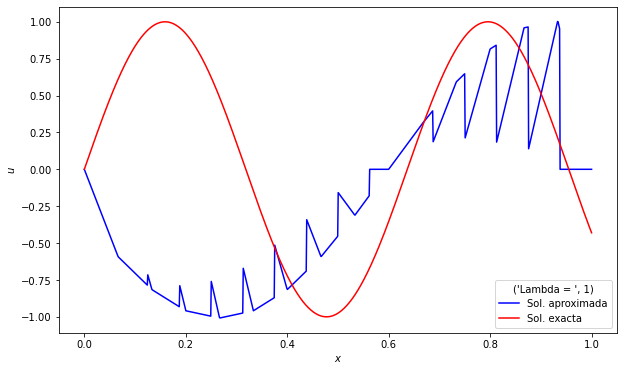

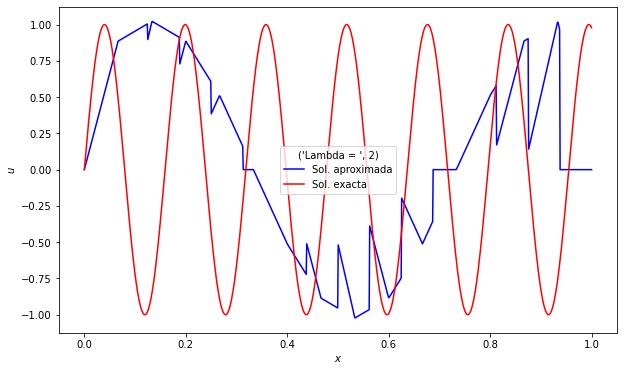

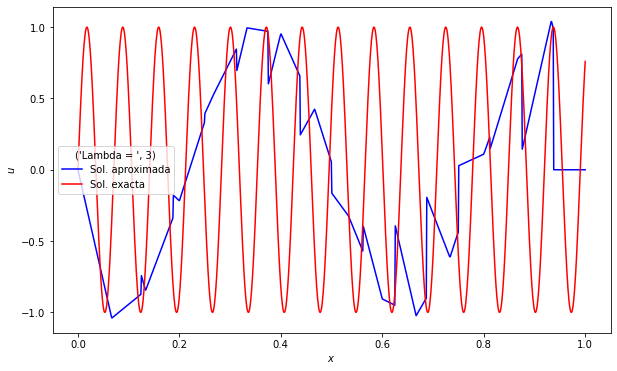

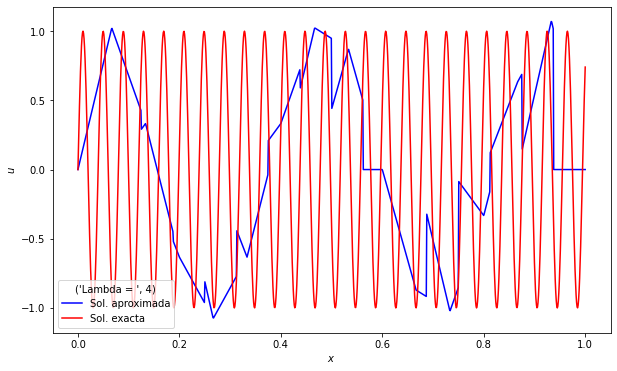

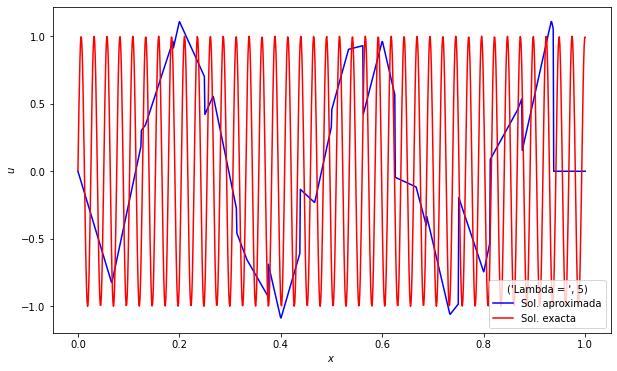

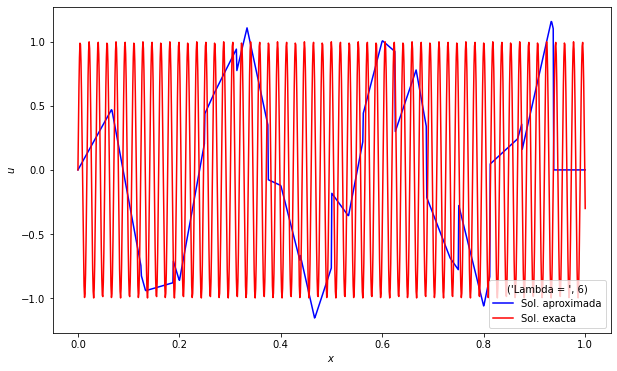

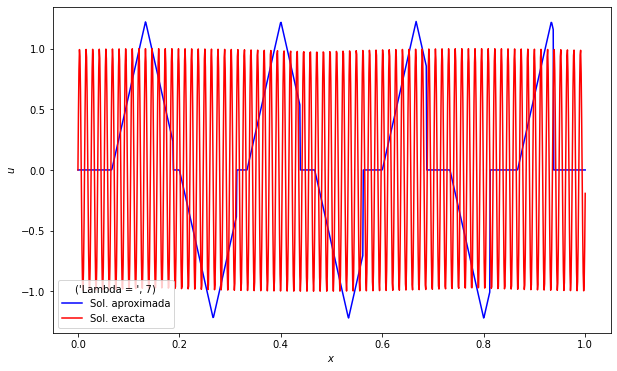

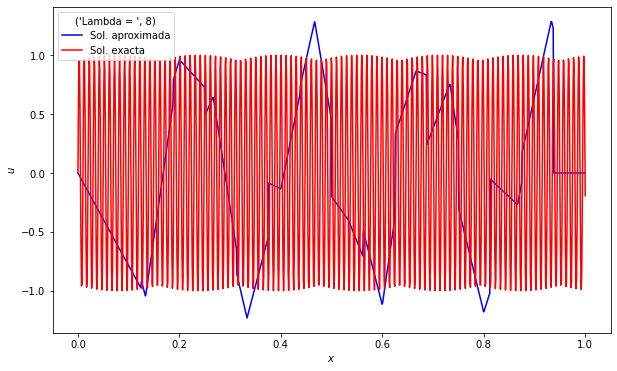

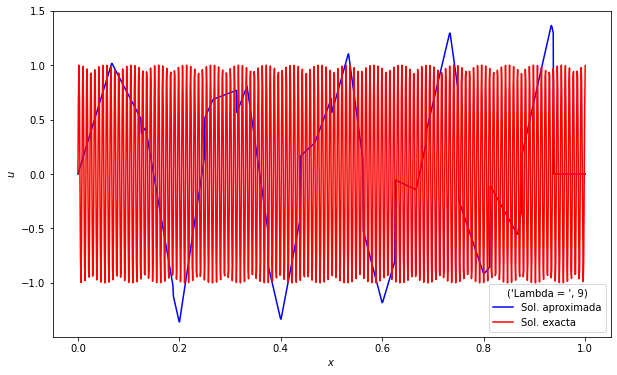

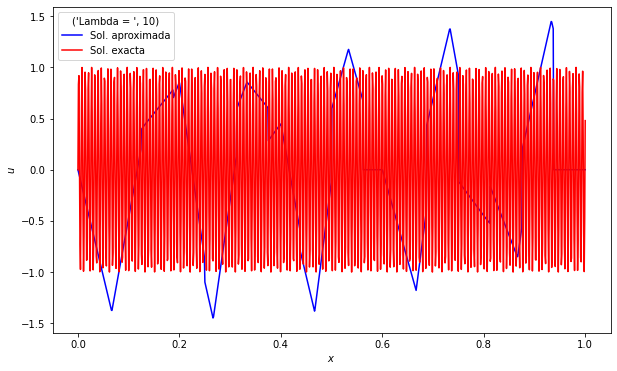

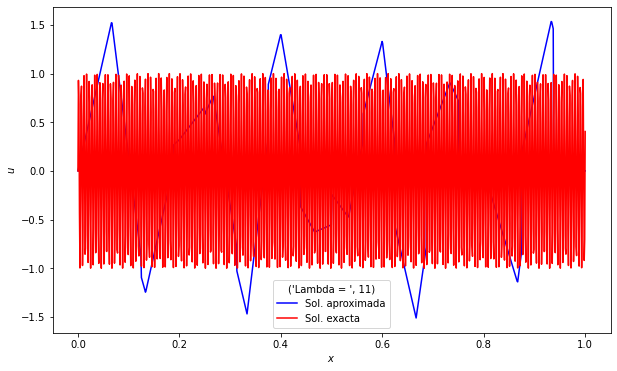

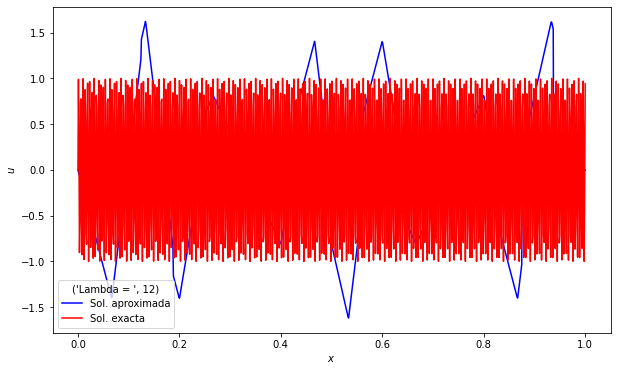

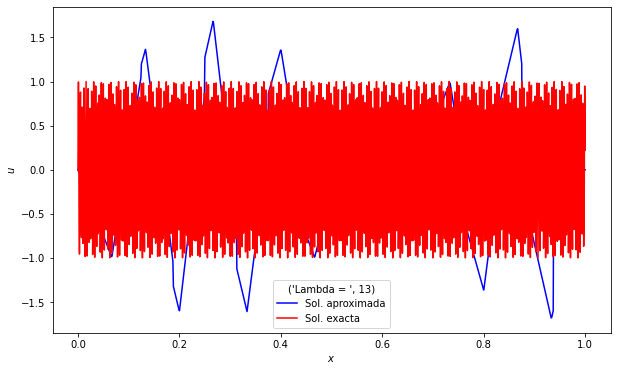

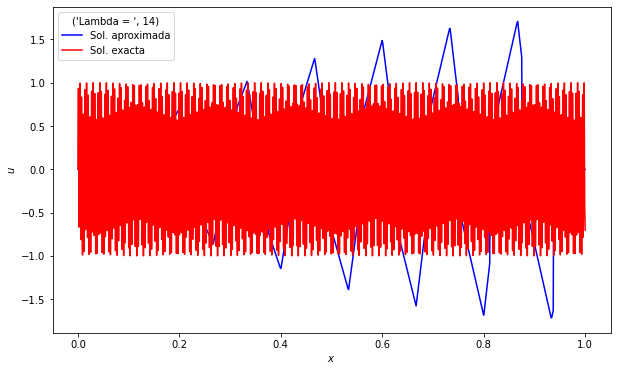

In [222]:
xs = np.linspace(a, b, 1000)

for L in range(1,n2-1):
    uhL = [u_h2(x,mesh,L) for x in xs]
    ueL = [u_e2(x,L) for x in xs]

    plt.figure(figsize=(10,6))
    
    plt.plot(xs, uhL, 'b', label='Sol. aproximada')
    plt.plot(xs, ueL, 'r', label='Sol. exacta')
    plt.xlabel('$x$')
    plt.ylabel('$u$')
    plt.legend(title= ('Lambda = ', L))
    plt.show()

No aproxima bien este método, para este tipo de funciones, se requiere hacer más particiones tal que pueda seguirle el paso a las oscilaciones de la función sin. 

## Problema 2: Método de Galerik

para esto vamos a resolver la EDO utilizando sympy

In [224]:
import sympy as sym

In [232]:
u = sym.symbols('u', cls=sym.Function)
x,v,a = sym.symbols('x v a')
u(x)
u(x).diff(x, x)

Derivative(u(x), (x, 2))

In [233]:
sym.dsolve(-v*u(x).diff(x, x) + a*u(x).diff(x)-1, u(x))

Eq(u(x), C1 + C2*exp(a*x/v) + x/a)

reemplazando 0, 1 en x para resolver con las condiciones de borde, obtenemos que:
$C1= 1/[v(e^{a/v}-1)], C2 = -1/[av(e^{a/v}-1)]$

#### Comentarios

P1, 
Implementación
El error disminuye mientras se pueda aumentar el numero de particiones, pero esto complica el calculo de las integrales ahí, en todo caso esto fue demostrado para una funcion bastante suave, habría que hacer mas experimentos con otras funciones y un dominio más grande para evaluar el coste computacional tambien.

El codigo tiene espacio para refinarse

Valores propios
Se aproximó de manera efectiva el valor de $u$ en los nodos, y sus valores propios. 
Sin embargo por la naturaleza de la función, nuestra aproximación no pudo manetener el ritmo con el que oscilaba la función original, crecían al cuadrado, por lo tanto habría que aumentar demasiado la cantidad de nodos al punto que se volvería ineficiente. 

Sería útil incorporar la naturaleza de la función al hacer las aproximaciones.

Tuve un problema con los indices que no logré resolver así que no puede probar con una red más fina.